In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Fixed Parameters
S0 = 100
K = 85
r = 0.05
q = 0.01
sig = 0.3
T = 1.0

In [3]:
#step-size
dS = 0.20

# number of grid points
n = 12
N = 2**n

# model under consideration
model = 'LogNormal'

In [4]:
def logNormal(S, r, q, sig, S0, T):
    
    f = np.exp(-0.5*((np.log(S/S0)-(r-q-sig**2/2)*T)/(sig*np.sqrt(T)))**2)/(sig*S*np.sqrt(2*np.pi*T))
    return f

In [5]:
def evaluateIntegral(*args):
    
    r   = args[0]
    q   = args[1]
    S0  = args[2]
    K   = args[3]
    sig = args[4]
    T   = args[5]
    N   = args[6]
    dS  = args[7]
    
    #discount factor
    df = np.exp(-r*T)
    
    # evaluation of the integral using Trapezoidal method
    sumC = 0
    sumP = 0

    S = np.zeros((N,1))
    for j in range(N):
        S[j] = 1.0+j*dS
        
    tmp = logNormal(S, r, q, sig, S0, T)

    for j in range(N):
        if j == 0:
            wj = dS/2
        else:
            wj = dS
        
        if (S[j] > K):
            sumC += (S[j]-K)*tmp[j]*wj
            
        if (S[j] < K):
            sumP += (K-S[j])*tmp[j]*wj
        
    c0_KT = df * sumC
    p0_KT = df * sumP
    
    return c0_KT, p0_KT 

In [6]:
# plotting lognormal density f(S|S0)
   
S = np.zeros((N,1))
for i in range(N):
    S[i] = dS+i*dS

f = logNormal(S, r, q, sig, S0, T)

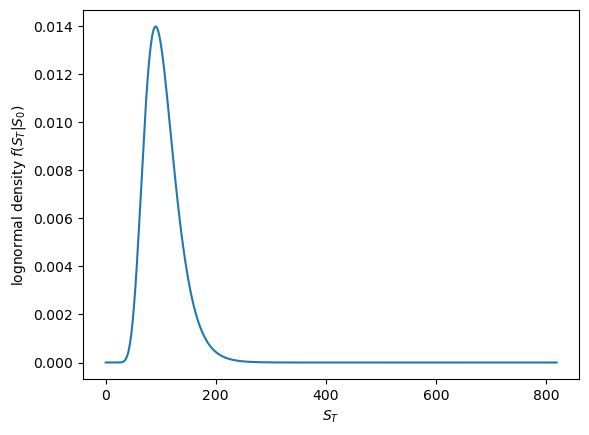

In [7]:
plt.plot(S, f)
plt.xlabel('$S_T$')
plt.ylabel('lognormal density $f(S_T|S_0)$')
plt.show()


In [8]:
start_time = time.time()
print(' ')
print('===================')
print('Model is %s' % model)
print('-------------------')
arg = (r, q, S0, K, sig, T, N, dS)
c0_KT, p0_KT = evaluateIntegral(*arg)
print(c0_KT, p0_KT)
elapsed_time = time.time() - start_time
print(elapsed_time)

 
Model is LogNormal
-------------------
[22.1250252] [3.97454291]
0.1326439380645752
